In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

print('✅ 라이브러리 로드 완료')

✅ 라이브러리 로드 완료


## 1. 데이터 로드

In [3]:
# 데이터 파일 경로
data_path = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/kaggle_flights/flight_data_2024_sample.csv'

# 데이터 로드
print('📂 데이터 로딩 중...')
df = pd.read_csv(data_path)
print(f'✅ 로드 완료: {len(df):,}개의 행')

# 기본 정보
print(f'\n데이터 크기: {df.shape}')
print(f'기간: {df["fl_date"].min()} ~ {df["fl_date"].max()}')

# 항공사 코드 → 이름 매핑
AIRLINE_NAMES = {
    'AA': 'American Airlines',
    'DL': 'Delta Air Lines',
    'UA': 'United Airlines',
    'WN': 'Southwest Airlines',
    'B6': 'JetBlue Airways',
    'AS': 'Alaska Airlines',
    'NK': 'Spirit Airlines',
    'F9': 'Frontier Airlines',
    'G4': 'Allegiant Air',
    'SY': 'Sun Country Airlines',
    'HA': 'Hawaiian Airlines',
    'QX': 'Horizon Air',
    'OO': 'SkyWest Airlines',
    '9E': 'Endeavor Air',
    'YX': 'Republic Airways',
    'YV': 'Mesa Airlines',
    'MQ': 'Envoy Air',
    'OH': 'PSA Airlines',
    'PT': 'Piedmont Airlines',
    'G7': 'GoJet Airlines'
}

# 항공사 이름 컬럼 추가
df['airline_name'] = df['op_unique_carrier'].map(AIRLINE_NAMES)
df['airline_name'] = df['airline_name'].fillna(df['op_unique_carrier'])  # 매핑 없으면 코드 사용

print(f'\n✈️ 항공사 이름 매핑 완료')
print(f'매핑된 항공사 수: {df["airline_name"].nunique()}개')

📂 데이터 로딩 중...
✅ 로드 완료: 10,000개의 행

데이터 크기: (10000, 35)
기간: 2024-01-01 ~ 2024-12-31

✈️ 항공사 이름 매핑 완료
매핑된 항공사 수: 15개


## 2. 데이터 구조 확인

In [4]:
# 컬럼 목록
print('📋 전체 컬럼 목록:')
print(df.columns.tolist())
print(f'\n총 {len(df.columns)}개의 컬럼')

📋 전체 컬럼 목록:
['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'airline_name']

총 36개의 컬럼


In [5]:
# 주요 컬럼만 표시
key_columns = ['fl_date', 'op_unique_carrier', 'airline_name', 'op_carrier_fl_num', 'origin', 'dest', 
               'crs_dep_time', 'dep_time', 'dep_delay', 'arr_delay', 'cancelled']

print('🔍 샘플 데이터 (주요 컬럼):')
df[key_columns].head(10)

🔍 샘플 데이터 (주요 컬럼):


,fl_date,op_unique_carrier,airline_name,op_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,arr_delay,cancelled
0,2024-04-18,MQ,Envoy Air,3535.0,DFW,RAP,1018,1015.0,-3.0,-10.0,0
1,2024-01-01,AA,American Airlines,148.0,CLT,PHX,1637,1633.0,-4.0,-17.0,0
2,2024-12-12,9E,Endeavor Air,5440.0,CHA,ATL,1000,952.0,-8.0,-17.0,0
3,2024-04-08,WN,Southwest Airlines,1971.0,OMA,LAS,1330,1334.0,4.0,1.0,0
4,2024-02-16,WN,Southwest Airlines,862.0,BWI,MYR,1340,1333.0,-7.0,-1.0,0
5,2024-04-15,WN,Southwest Airlines,2358.0,SAN,PHX,715,708.0,-7.0,-14.0,0
6,2024-11-27,G4,Allegiant Air,163.0,MLB,ABE,933,924.0,-9.0,-4.0,0
7,2024-08-31,AS,Alaska Airlines,1269.0,BNA,PDX,1855,1850.0,-5.0,-27.0,0
8,2024-04-19,OO,SkyWest Airlines,3438.0,LAX,SJC,820,814.0,-6.0,-2.0,0
9,2024-02-08,OO,SkyWest Airlines,5654.0,SFO,BFL,2235,2227.0,-8.0,-23.0,0


In [6]:
# 데이터 타입
print('📊 데이터 타입:')
df[key_columns].dtypes

📊 데이터 타입:


fl_date                  str
op_unique_carrier        str
airline_name             str
op_carrier_fl_num    float64
origin                   str
dest                     str
crs_dep_time           int64
dep_time             float64
dep_delay            float64
arr_delay            float64
cancelled              int64
dtype: object

In [7]:
# 결측치 확인
print('❓ 결측치 현황:')
missing = df[key_columns].isnull().sum()
missing[missing > 0].sort_values(ascending=False)

❓ 결측치 현황:


arr_delay    164
dep_time     116
dep_delay    116
dtype: int64

## 3. 출발지별 분포 확인

In [8]:
# 출발지별 항공편 수
print('🛫 출발지별 항공편 분포 (상위 20개):')
origin_counts = df['origin'].value_counts().head(20)
print(origin_counts)
print(f'\n전체 출발지 수: {df["origin"].nunique()}개')

# JFK는 테스트용으로만 사용
jfk_count = len(df[df['origin'] == 'JFK'])
print(f'\n⚠️ JFK 출발편: {jfk_count:,}개 ({jfk_count/len(df)*100:.2f}%) - 테스트용으로만 사용')

🛫 출발지별 항공편 분포 (상위 20개):
origin
ATL    496
DFW    438
DEN    412
ORD    391
CLT    319
PHX    289
LAX    282
LAS    236
LGA    235
MCO    224
SEA    209
EWR    198
DTW    194
JFK    194
BOS    194
SFO    188
DCA    175
MSP    169
MIA    163
IAH    160
Name: count, dtype: int64

전체 출발지 수: 284개

⚠️ JFK 출발편: 194개 (1.94%) - 테스트용으로만 사용


## 4. 국내선만 필터링 (전체 공항 대상)

In [9]:
# 미국 주요 국내선 공항 코드
DOMESTIC_AIRPORTS = {
    'ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'SFO', 'SEA', 'LAS', 'MCO', 'EWR',
    'CLT', 'PHX', 'IAH', 'MIA', 'BOS', 'MSP', 'FLL', 'DTW', 'PHL', 'LGA',
    'BWI', 'SLC', 'SAN', 'DCA', 'MDW', 'TPA', 'PDX', 'STL', 'HNL', 'AUS',
    'BNA', 'OAK', 'RDU', 'SMF', 'SJC', 'SNA', 'PIT', 'CVG', 'CMH', 'IND',
    'MKE', 'OMA', 'BUF', 'PVD', 'BDL', 'ALB', 'ROC', 'SYR', 'RIC', 'CLE',
    'JFK', 'ABQ', 'ANC', 'BHM', 'BOI', 'BUR', 'CHS', 'COS', 'DAL', 'DSM',
    'ELP', 'FAT', 'GEG', 'GRR', 'GSO', 'GSP', 'JAX', 'LBB', 'LEX', 'LIT',
    'MCI', 'MEM', 'MSY', 'OKC', 'ONT', 'PBI', 'PHF', 'PWM', 'RNO', 'RSW',
    'SJU', 'SAT', 'SAV', 'SDF', 'TUL', 'TUS', 'XNA'
}

# 국내선만 필터링 (출발지와 도착지 모두 국내)
print('🇺🇸 국내선 필터링...')
domestic_flights = df[
    df['origin'].isin(DOMESTIC_AIRPORTS) & 
    df['dest'].isin(DOMESTIC_AIRPORTS)
].copy()
print(f'✅ 국내선 항공편: {len(domestic_flights):,}개 ({len(domestic_flights)/len(df)*100:.1f}%)')

# 상위 출발지
print('\n📍 국내선 상위 출발지 (Top 10):')
print(domestic_flights['origin'].value_counts().head(10))

🇺🇸 국내선 필터링...
✅ 국내선 항공편: 7,525개 (75.2%)

📍 국내선 상위 출발지 (Top 10):
origin
ATL    362
ORD    303
DEN    303
DFW    295
LAX    260
PHX    252
CLT    224
LGA    214
LAS    214
MCO    199
Name: count, dtype: int64


## 5. 데이터 전처리

In [10]:
# 취소된 항공편 제거
print('🚫 취소된 항공편 제거...')
cancelled_count = domestic_flights['cancelled'].sum()
print(f'   취소된 항공편: {cancelled_count}개')

domestic_active = domestic_flights[domestic_flights['cancelled'] == 0].copy()
print(f'✅ 운항된 항공편: {len(domestic_active):,}개')

🚫 취소된 항공편 제거...
   취소된 항공편: 91개
✅ 운항된 항공편: 7,434개


In [11]:
# 시간 데이터 변환
def convert_time(time_val):
    """HHMM 형식을 HH:MM으로 변환"""
    if pd.isna(time_val):
        return None
    time_str = str(int(time_val)).zfill(4)
    return f"{time_str[:2]}:{time_str[2:]}"

# 예정/실제 출발 시간 변환
domestic_active['scheduled_time'] = domestic_active['crs_dep_time'].apply(convert_time)
domestic_active['actual_time'] = domestic_active['dep_time'].apply(convert_time)

print('⏰ 시간 형식 변환 완료')
print('\n샘플:')
domestic_active[['fl_date', 'scheduled_time', 'actual_time', 'dep_delay']].head()

⏰ 시간 형식 변환 완료

샘플:


,fl_date,scheduled_time,actual_time,dep_delay
1,2024-01-01,16:37,16:33,-4.0
3,2024-04-08,13:30,13:34,4.0
5,2024-04-15,07:15,07:08,-7.0
7,2024-08-31,18:55,18:50,-5.0
8,2024-04-19,08:20,08:14,-6.0


In [12]:
# 항공편 번호 생성 (정수로 변환)
domestic_active['flight_number'] = (
    domestic_active['op_unique_carrier'] + 
    domestic_active['op_carrier_fl_num'].astype(int).astype(str)
)

print('✈️ 항공편 번호 생성 완료')
print('\n샘플:')
domestic_active[['flight_number', 'airline_name', 'origin', 'dest', 'scheduled_time']].head()

✈️ 항공편 번호 생성 완료

샘플:


,flight_number,airline_name,origin,dest,scheduled_time
1,AA148,American Airlines,CLT,PHX,16:37
3,WN1971,Southwest Airlines,OMA,LAS,13:30
5,WN2358,Southwest Airlines,SAN,PHX,07:15
7,AS1269,Alaska Airlines,BNA,PDX,18:55
8,OO3438,SkyWest Airlines,LAX,SJC,08:20


## 6. 지연 통계 분석

In [13]:
# 지연 통계
print('📊 출발 지연 통계:')
print(domestic_active['dep_delay'].describe())

print('\n⏰ 지연 분류:')
delay_categories = pd.cut(
    domestic_active['dep_delay'],
    bins=[-float('inf'), 0, 15, 30, 60, float('inf')],
    labels=['정시/조기', '15분 이하', '15-30분', '30-60분', '60분 이상']
)
print(delay_categories.value_counts().sort_index())

📊 출발 지연 통계:
count    7434.000000
mean       13.449960
std        53.226147
min       -19.000000
25%        -5.000000
50%        -2.000000
75%        10.000000
max      2011.000000
Name: dep_delay, dtype: float64

⏰ 지연 분류:
dep_delay
정시/조기     4568
15분 이하    1300
15-30분     511
30-60분     457
60분 이상     598
Name: count, dtype: int64


/tmp/ipykernel_383936/2209330599.py:19: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_383936/2209330599.py:19: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_383936/2209330599.py:19: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_383936/2209330599.py:19: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_383936/2209330599.py:19: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_383936/2209330599.py:19: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_383936/2209330599.py:19: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  p

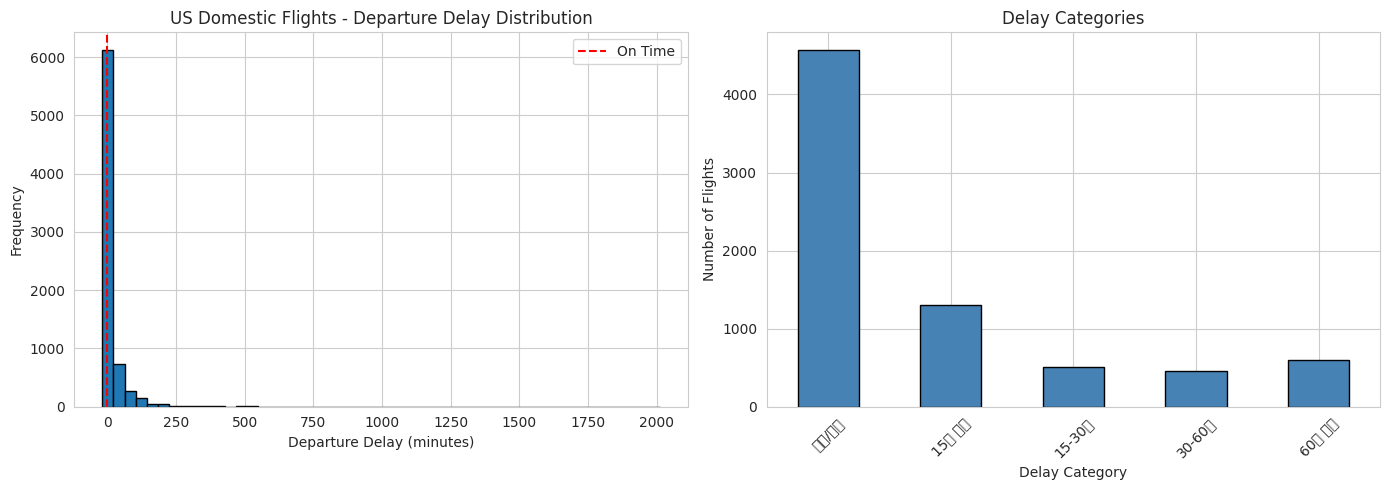


평균 지연: 13.4분
중앙값 지연: -2.0분


In [14]:
# 지연 분포 시각화
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
domestic_active['dep_delay'].hist(bins=50, edgecolor='black')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.title('US Domestic Flights - Departure Delay Distribution')
plt.axvline(0, color='red', linestyle='--', label='On Time')
plt.legend()

plt.subplot(1, 2, 2)
delay_categories.value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Delay Category')
plt.ylabel('Number of Flights')
plt.title('Delay Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f'\n평균 지연: {domestic_active["dep_delay"].mean():.1f}분')
print(f'중앙값 지연: {domestic_active["dep_delay"].median():.1f}분')

## 7. 시간대별 분석

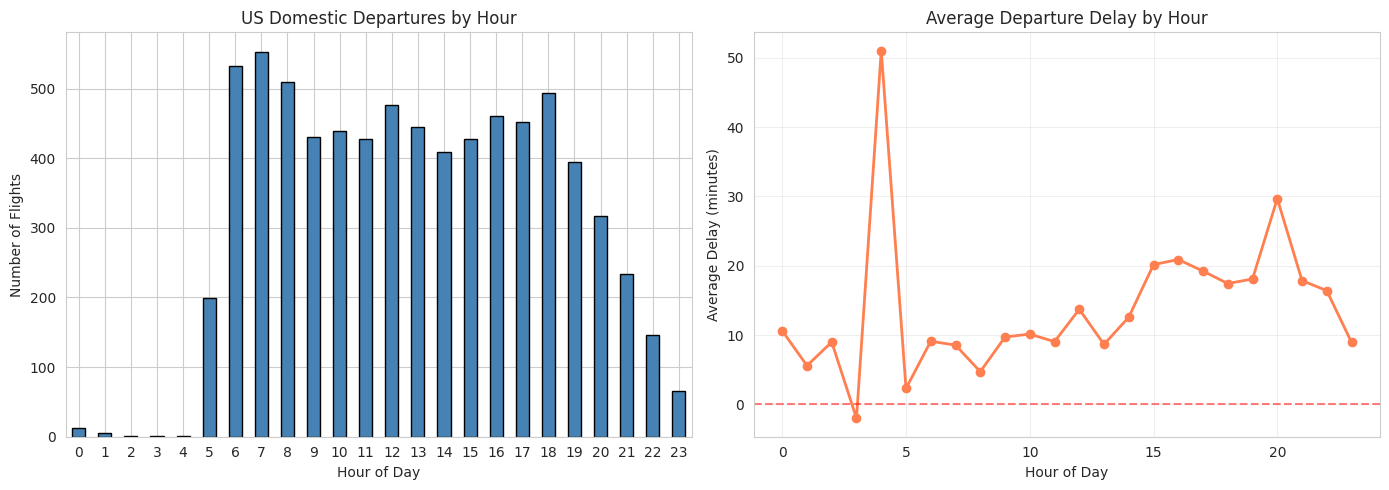


⏰ 시간대별 평균 지연:
hour
0     10.6
1      5.6
2      9.0
3     -2.0
4     51.0
5      2.3
6      9.1
7      8.6
8      4.7
9      9.7
10    10.2
11     9.1
12    13.7
13     8.7
14    12.6
15    20.2
16    20.9
17    19.2
18    17.4
19    18.1
20    29.7
21    17.9
22    16.4
23     9.0
Name: dep_delay, dtype: float64


In [15]:
# 시간대 추출
domestic_active['hour'] = domestic_active['crs_dep_time'].apply(
    lambda x: int(str(int(x)).zfill(4)[:2]) if pd.notna(x) else None
)

# 시간대별 항공편 수
flights_by_hour = domestic_active['hour'].value_counts().sort_index()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
flights_by_hour.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.title('US Domestic Departures by Hour')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
delay_by_hour = domestic_active.groupby('hour')['dep_delay'].mean()
delay_by_hour.plot(kind='line', marker='o', color='coral', linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Departure Delay by Hour')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n⏰ 시간대별 평균 지연:')
print(delay_by_hour.round(1))

## 8. 항공사별 분석

In [16]:
# 항공사별 통계
carrier_stats = domestic_active.groupby('airline_name').agg({
    'flight_number': 'count',
    'dep_delay': 'mean'
}).round(1)
carrier_stats.columns = ['총 항공편', '평균 지연(분)']
carrier_stats = carrier_stats.sort_values('총 항공편', ascending=False)

print('✈️ 항공사별 통계:')
print(carrier_stats)

# 지연이 심한 항공사 Top 5
print('\n⚠️ 평균 지연이 가장 심한 항공사 (항공편 100개 이상):')
delay_carriers = carrier_stats[carrier_stats['총 항공편'] >= 100].sort_values('평균 지연(분)', ascending=False)
print(delay_carriers.head())

✈️ 항공사별 통계:
                    총 항공편  평균 지연(분)
airline_name                       
Southwest Airlines   1638      12.7
Delta Air Lines      1261      10.9
American Airlines    1226      21.4
United Airlines       823      12.6
SkyWest Airlines      450      10.5
Republic Airways      360       1.1
Spirit Airlines       319      14.4
JetBlue Airways       295      18.2
Frontier Airlines     266      18.5
Alaska Airlines       255       5.9
Envoy Air             185       8.4
Endeavor Air          164      10.3
PSA Airlines          151      20.0
Allegiant Air          28      36.0
Hawaiian Airlines      13       7.5

⚠️ 평균 지연이 가장 심한 항공사 (항공편 100개 이상):
                   총 항공편  평균 지연(분)
airline_name                      
American Airlines   1226      21.4
PSA Airlines         151      20.0
Frontier Airlines    266      18.5
JetBlue Airways      295      18.2
Spirit Airlines      319      14.4


## 9. 최종 데이터 준비

In [17]:
# 출발 시간 예측 시스템 평가용 데이터 생성
final_columns = [
    'fl_date', 'flight_number', 'op_unique_carrier', 'airline_name', 'origin', 'dest',
    'scheduled_time', 'actual_time', 'dep_delay',
    'crs_dep_time', 'dep_time'
]

eval_data = domestic_active[final_columns].copy()

# 결측치 제거
eval_data = eval_data.dropna(subset=['scheduled_time', 'actual_time', 'dep_delay'])

print(f'📊 최종 평가 데이터: {len(eval_data):,}개 항공편')
print('\n샘플:')
eval_data.head(10)

📊 최종 평가 데이터: 7,434개 항공편

샘플:


,fl_date,flight_number,op_unique_carrier,airline_name,origin,dest,scheduled_time,actual_time,dep_delay,crs_dep_time,dep_time
1,2024-01-01,AA148,AA,American Airlines,CLT,PHX,16:37,16:33,-4.0,1637,1633.0
3,2024-04-08,WN1971,WN,Southwest Airlines,OMA,LAS,13:30,13:34,4.0,1330,1334.0
5,2024-04-15,WN2358,WN,Southwest Airlines,SAN,PHX,07:15,07:08,-7.0,715,708.0
7,2024-08-31,AS1269,AS,Alaska Airlines,BNA,PDX,18:55,18:50,-5.0,1855,1850.0
8,2024-04-19,OO3438,OO,SkyWest Airlines,LAX,SJC,08:20,08:14,-6.0,820,814.0
10,2024-09-19,G41510,G4,Allegiant Air,DSM,AUS,15:01,15:48,47.0,1501,1548.0
11,2024-03-28,AA2050,AA,American Airlines,MIA,LGA,20:39,21:15,36.0,2039,2115.0
12,2024-06-14,AA1911,AA,American Airlines,RIC,CLT,06:35,06:39,4.0,635,639.0
13,2024-10-26,WN1102,WN,Southwest Airlines,TPA,BNA,19:25,19:11,-14.0,1925,1911.0
14,2024-08-21,AA2832,AA,American Airlines,LAX,PHL,09:05,09:03,-2.0,905,903.0


In [18]:
# 랜덤 샘플링 (50개)
eval_sample = eval_data.sample(n=min(50, len(eval_data)), random_state=42)

print(f'🎯 평가용 샘플: {len(eval_sample)}개')
print('\n목적지 분포:')
print(eval_sample['dest'].value_counts())

🎯 평가용 샘플: 50개

목적지 분포:
dest
LAS    5
PHX    5
SLC    3
ATL    3
RDU    2
SJC    2
PHL    2
OMA    2
BWI    2
SEA    2
DCA    2
SFO    2
MIA    2
OKC    1
TUL    1
CHS    1
SMF    1
BOS    1
MKE    1
DAL    1
IAH    1
JFK    1
CLE    1
CLT    1
SAN    1
COS    1
DTW    1
PBI    1
LAX    1
Name: count, dtype: int64


## 10. 데이터 저장

In [19]:
# 전체 정제 데이터 저장
output_full = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/all_domestic_cleaned.csv'
eval_data.to_csv(output_full, index=False)
print(f'💾 전체 데이터 저장: {output_full}')
print(f'   크기: {len(eval_data):,}개 항공편')

# JFK 테스트용 데이터 별도 저장
jfk_test_data = eval_data[eval_data['origin'] == 'JFK'].copy()
output_jfk = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/jfk_test_data.csv'
jfk_test_data.to_csv(output_jfk, index=False)
print(f'\n💾 JFK 테스트 데이터 저장: {output_jfk}')
print(f'   크기: {len(jfk_test_data):,}개 항공편')

# 평가용 샘플 (전체에서 랜덤 샘플링)
eval_sample = eval_data.sample(n=min(100, len(eval_data)), random_state=42)
output_sample = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/domestic_eval_100.csv'
eval_sample.to_csv(output_sample, index=False)
print(f'\n💾 평가 샘플 저장: {output_sample}')
print(f'   크기: {len(eval_sample)}개 항공편')

💾 전체 데이터 저장: /home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/all_domestic_cleaned.csv
   크기: 7,434개 항공편

💾 JFK 테스트 데이터 저장: /home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/jfk_test_data.csv
   크기: 181개 항공편

💾 평가 샘플 저장: /home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/domestic_eval_100.csv
   크기: 100개 항공편


## ✅ 전처리 완료!

### 생성된 파일:
1. `all_domestic_cleaned.csv` - 전체 국내선 데이터 (학습/평가용)
2. `jfk_test_data.csv` - JFK 출발편만 (테스트용)
3. `domestic_eval_100.csv` - 랜덤 샘플 100개 (빠른 평가용)

### 다음 단계:
1. 저장된 데이터로 출발 시간 예측 시스템 평가
2. 실제 지연 시간과 시스템 추천 비교
3. 항공사별 정확도 분석
4. 정확도 지표 계산